### Q1 (5 points). P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03
For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

#### 5 regressors: with the p_values of 0.02, 3e-15, 0.04, 0.001, 0.03

### Q2 (5 points). Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5]

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100]

c. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

#### a,c

#### The range of the confidence interval is defined by the sample statistic + margin of error. And the uncertainty associated with the confidence interval is specified by the confidence level. So the mean of the interval most be 10.

### Q3.(Car Price Example, 20pts)
You are given a dataset containing the information regarding car prices:
'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls'  

**VARIABLE DESCRIPTIONS:** (Data was collected in 2005)
* Price: suggested retail price of the used 2005 GM car in excellent condition. The condition of a car can greatly affect price. All cars in this data set were less than one year old when priced and considered to be in excellent condition. 
* Mileage: number of miles the car has been driven
* Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
* Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
* Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
* Type: body type such as sedan, coupe, etc.
* Cylinder: number of cylinders in the engine	
* Liter: a more specific measure of engine size	
* Doors: number of doors	
* Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
* Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
* Leather: indicator variable representing whether the car has leather seats (1 = leather)
  
Run the regression modeling the price through all the features above except 'Model","Trim" and "Type" and analyse its statistics. Based on the results suppose there's a price X you have to pay for each additional Liter of your tank capacity, then:
* (a) What's the expected price E(X)?  
* (b) What's the probability that X > \$4500?  
* (c) What's the two-sided 90% confidence interval of X?
* (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$
   

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [36]:
data3 = pd.read_excel('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls')
data3.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [37]:
data3 = data3.drop('Model', axis = 1)
data3 = data3.drop('Trim',axis = 1)
data3 = data3.drop('Type',axis = 1)
data3.head()

,Price,Mileage,Make,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,6,3.1,4,1,0,1


In [40]:
data3_make = pd.get_dummies(data3.Make)

In [41]:
#Saturn,SAAB,Pontiac,Chevrolet,Cadillac,Buick
data3 = pd.concat([data3, data3_make], axis=1)
data3.head()

,Price,Mileage,Make,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,17314.103129,8221,Buick,6,3.1,4,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0
1,17542.036083,9135,Buick,6,3.1,4,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,16218.847862,13196,Buick,6,3.1,4,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,16336.913140,16342,Buick,6,3.1,4,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,16339.170324,19832,Buick,6,3.1,4,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
lm3 = smf.ols(formula = 'Price ~ Mileage + Cylinder + Liter + Doors + Cruise + Sound + Leather +'\
              'Buick +Cadillac+Chevrolet+Pontiac+SAAB+Saturn', data = data3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     479.0
Date:                Thu, 20 Oct 2016   Prob (F-statistic):               0.00
Time:                        20:45:31   Log-Likelihood:                -7687.0
No. Observations:                 804   AIC:                         1.540e+04
Df Residuals:                     791   BIC:                         1.546e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.698e+04   1005.537     16.890      0.000       1.5e+04   1.9e+04
Mileage       -0.1804      0.015    -12.050      0.000        -0.210    -0.151
Cylinder    -215.0175    404.027     -0.532      0.595     -1008.110   578.075
Liter       4760.4180    459.970     10.349      0.000      3857.513  5663.324
Doors      -1710.0569    155.249    -11.015      0.000     -2014.805 -1405.309
Cruise      -503.8479    346.723     -1.453      0.147     -1184.454   176.758
Sound        -44.0784    277.268     -0.159      0.874      -588.348   500.191
Leather       25.4588    299.765      0.085      0.932      -562.971   613.888
Buick      -1266.6426    434.707     -2.914      0.004     -2119.958  -413.328
Cadillac      1.5e+04    615.472     24.380      0.000      1.38e+04  1.62e+04
Chevrolet  -3503.9822    250.018    -14.015      0.000     -3994.760 -3013.205
Pontiac    -3045.6607    319.612     -9.529      0.000     -3673.050 -2418.272
SAAB        1.337e+04    353.842     37.793      0.000      1.27e+04  1.41e+04
Saturn     -3578.2657    410.262     -8.722      0.000     -4383.597 -2772.935
==============================================================================
Omnibus:                      402.163   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4473.412
Skew:                           1.991   Prob(JB):                         0.00
Kurtosis:                      13.848   Cond. No.                     1.51e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
data3[['Price','Liter']].corr()

,Price,Liter
Price,1.000000,0.558146
Liter,0.558146,1.000000


#### (a) What's the expected price E(X)?
 4760.4180
 
See the correlation of  Liter

#### (b) What's the probability that X > $4500?
71.43%

Don't know the sd of the population so asume the Z-test as t-test and use the error of samples

In [66]:
num3 = 1
df3 = 791
Std_Liter = 459.970
E_Liter = 4760.418023
t_Liter = abs(4500 - E_Liter)/(Std_Liter/num3)
t_Liter

0.5661630606343896

In [65]:
stats.t.cdf(t_Liter,df3)

0.71427823887737607

#### So the probability that X>$4500 is 0.71427823887737607

#### (c) What's the two-sided 90% confidence interval of X?

In [73]:
stats.norm.interval(0.90, loc=lm3.params[3], scale=Std_Liter)

(4003.8347003982999, 5517.0013459760376)

#### (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval  [X0,+∞)

In [74]:
stats.norm.interval(0.80, loc=lm3.params[3], scale=Std_Liter)[0]

4170.9427495836189

### Q4. Dimension reduction using PCA.  (40 pts)

Let's see the handwriting digits data set. This data set includes 1787 digits. And for each digit, we have 64 binary variables x1,x2,...x64, each one representing a pixel on the 8x8 image (1-belongs to an image, 0-blank). The label (y) for each digit image is the actual digit it represents from 0 to 9.  

In [25]:
#Run the following code.
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [31]:
X

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


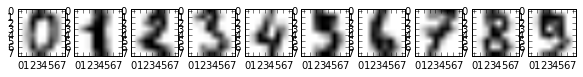

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Let's start our questions. 

#### Part one. We have 64-dimension feature space(exclude y) X.  (5pts+5pts)
a. Assume we need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot. 

b. What is the total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.

#### Part two. Let's use PCA to reduce the dimensionality of digits data set from 64 to 3. And then  visulize the transformed space on a 3 dimensional plot. Please color the points with respect to their label y. (10 pts)

#### Part three. Take the data for digits 3 and 8 from the origional data set and call it data1. (20pts)
a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain? 

b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.

c. Visulize the feature space using third and fourth eigenvectors(directions).

d. Visulize the feature space using the last two eigenvectors(directions).


#### Part one. a. Assume we need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot.

[  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.29961363e-05   1.24365445e-05
   7.04827911e-06   3.01432139e-06

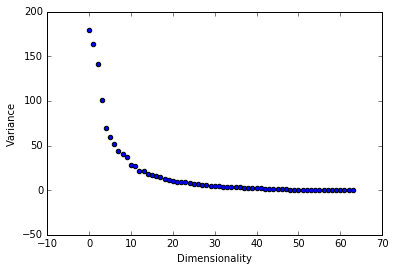

In [5]:

n=64 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(X)
#eigenvalues->epand variances
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_
plt.scatter(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

#### Part one. b. What is the total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.


total variance:1201.47873736


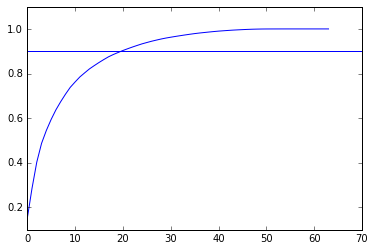

In [16]:
print("total variance:{}".format(np.sum(np.var(X,0))))
#print("variance explained via the first and second components:{}\n".format(pca.explained_variance_))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axhline(y=0.9)

#### Part two. Let's use PCA to reduce the dimensionality of digits data set from 64 to 3. And then visulize the transformed space on a 3 dimensional plot. Please color the points with respect to their label y. (10 pts)


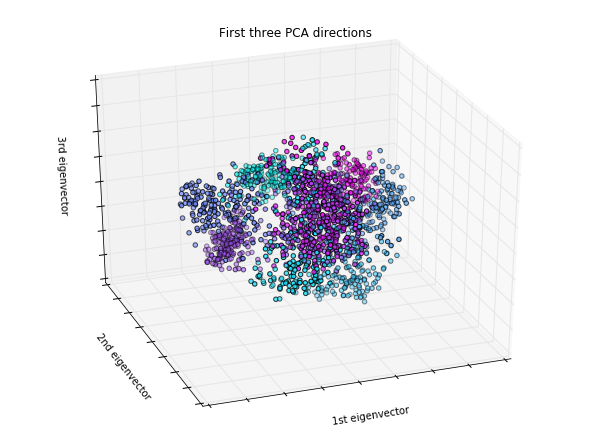

In [21]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y,
           cmap=plt.cm.cool)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Part three. Take the data for digits 3 and 8 from the origional data set and call it data1. (20pts)
a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain?


In [36]:
data1 = data[data.y.isin([3,8])]
n1 = 64
pca1 = PCA(n1)
Xproj1 = pca1.fit_transform(data1.drop("y",axis=1))
print("total variance:{}".format(np.sum(np.var(Xproj1,0))))
print ("The first two explain the {} percent of the variance".format(pca1.explained_variance_ratio_.cumsum()[1]*100))


total variance:848.643080762
The first two explain the 36.2281784395 percent of the variance


#### b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.


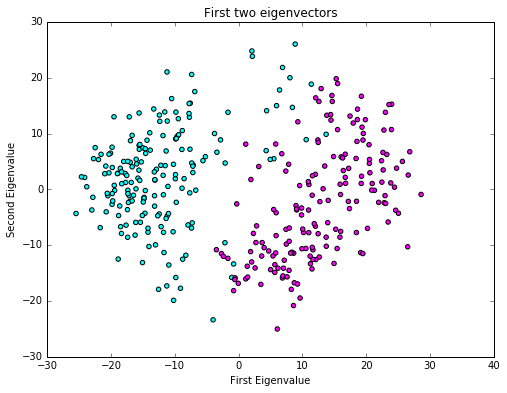

In [38]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(Xproj1[:, 0], Xproj1[:, 1], c=data1.y, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.title("First two eigenvectors")
plt.show()

#### c. Visulize the feature space using third and fourth eigenvectors(directions).


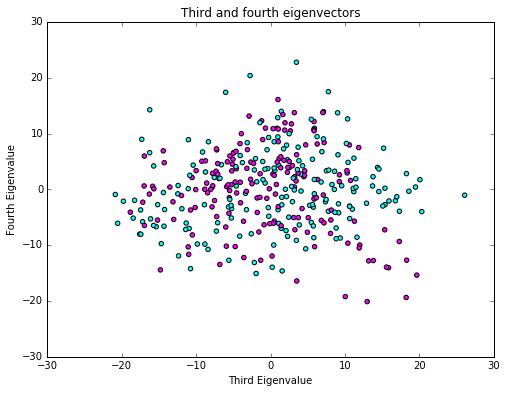

In [40]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(Xproj1[:, 2], Xproj1[:, 3], c=data1.y, cmap=plt.cm.cool)
plt.xlabel('Third Eigenvalue')
plt.ylabel('Fourth Eigenvalue')
plt.title("Third and fourth eigenvectors")
plt.show()

#### d. Visulize the feature space using the last two eigenvectors(directions).

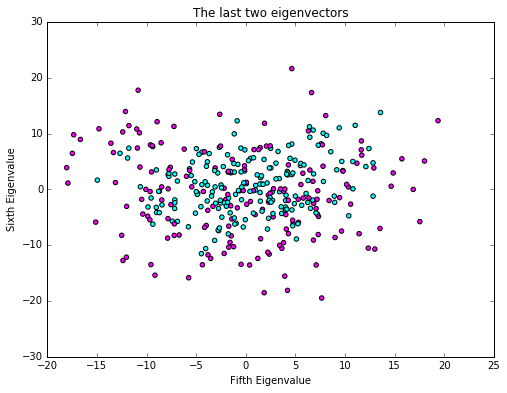

In [41]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(Xproj1[:, 4], Xproj1[:, 5], c=data1.y, cmap=plt.cm.cool)
plt.xlabel('Fifth Eigenvalue')
plt.ylabel('Sixth Eigenvalue')
plt.title("The last two eigenvectors")
plt.show()

##### Q5. (30 pts)

In [47]:
data=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474//ADS_Data/session06/data_hw_3_4.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


#### A. Run a linear regression : Y~x1+..+x15 (without constant) and report the summary of this regression result. (5pts)

In [49]:
import statsmodels.api as sm
Y = data.Y
X = data.drop("Y", axis=1)
fit5 = sm.OLS(Y,X).fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7.682
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           3.73e-07
Time:                        16:34:03   Log-Likelihood:                -64.562
No. Observations:                  50   AIC:                             159.1
Df Residuals:                      35   BIC:                             187.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3026      1.692      1.951      0.059        -0.133     6.738
x2            -4.8609      2.527     -1.923      0.063        -9.992     0.270
x3            -4.0675      2.081     -1.955      0.059        -8.291     0.156
x4             3.2891      1.689      1.948      0.060        -0.139     6.718
x5             4.6096      2.413      1.910      0.064        -0.290     9.509
x6            -0.0026      0.026     -0.102      0.920        -0.055     0.050
x7            -0.0358      0.028     -1.263      0.215        -0.093     0.022
x8            -0.1495      0.037     -4.070      0.000        -0.224    -0.075
x9             0.0564      0.038      1.490      0.145        -0.020     0.133
x10           -0.0186      0.035     -0.534      0.597        -0.089     0.052
x11           -0.0311      0.030     -1.023      0.313        -0.093     0.031
x12            0.0553      0.032      1.708      0.097        -0.010     0.121
x13           -0.0676      0.032     -2.086      0.044        -0.133    -0.002
x14           -0.0939      0.035     -2.702      0.011        -0.164    -0.023
x15            0.0265      0.035      0.759      0.453        -0.044     0.097
==============================================================================
Omnibus:                        1.488   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                0.806
Skew:                          -0.278   Prob(JB):                        0.668
Kurtosis:                       3.280   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### B. Demonstrate the overfitting problem by 1000 times cross-validation.  Report average OS and IS R-squared.  (10 pts)

In [52]:
# Using cross validation.
R_IS=[]
R_OS=[]

# Why we need this? let's set n=1 and run several times to see.
n=1000
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.80796963188
OS R-squared for 1000 times is 0.268696035003


#### C. Repeat A and B on features after feature selection(p value<0.05). (5pts)

In [53]:
#select x based on the p_value. x8,x13 and x14 have the minimum p_value among all the features
X_select = X[["x8", "x13", "x14"]]
fit5_1 = sm.OLS(Y,X_select).fit()
fit5_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.1933
Date:                Sun, 23 Oct 2016   Prob (F-statistic):              0.900
Time:                        16:37:05   Log-Likelihood:                -100.68
No. Observations:                  50   AIC:                             207.4
Df Residuals:                      47   BIC:                             213.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x8             0.0054      0.046      0.116      0.908        -0.087     0.098
x13           -0.0099      0.048     -0.205      0.838        -0.107     0.087
x14            0.0196      0.039      0.497      0.621        -0.060     0.099
==============================================================================
Omnibus:                        2.005   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.680
Skew:                           0.446   Prob(JB):                        0.432
Kurtosis:                       2.903   Cond. No.                         4.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Using cross validation.
R_IS=[]
R_OS=[]

# Why we need this? let's set n=1 and run several times to see.
n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.807895983719
OS R-squared for 1000 times is 0.26759958979


#### D. Transform the data set by PCA and keep all 15 eigenvectors(directions). Call the new data set after transformation Xproj. And repeat questions A and B using Xproj. (10 pts)

In [56]:
n = 15
pca = PCA(n)
Xproj = pca.fit_transform(data.drop("Y", axis=1))
fit5d = sm.OLS(Y,Xproj).fit()
fit5d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           5.31e-09
Time:                        16:37:21   Log-Likelihood:                -57.896
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      35   BIC:                             174.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0200      0.004      5.321      0.000         0.012     0.028
x2             0.0469      0.006      7.941      0.000         0.035     0.059
x3             0.0047      0.007      0.642      0.525        -0.010     0.020
x4             0.0424      0.013      3.224      0.003         0.016     0.069
x5            -0.0117      0.019     -0.618      0.541        -0.050     0.027
x6            -0.0063      0.020     -0.314      0.755        -0.047     0.034
x7             0.0373      0.022      1.722      0.094        -0.007     0.081
x8             0.0376      0.024      1.538      0.133        -0.012     0.087
x9            -0.0048      0.026     -0.188      0.852        -0.057     0.047
x10           -0.0423      0.027     -1.558      0.128        -0.097     0.013
x11            0.0458      0.033      1.395      0.172        -0.021     0.112
x12            0.1637      0.035      4.622      0.000         0.092     0.236
x13           -0.0761      0.037     -2.072      0.046        -0.151    -0.002
x14           -0.0622      0.042     -1.484      0.147        -0.147     0.023
x15           43.5872      9.538      4.570      0.000        24.224    62.950
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.464
Skew:                          -0.217   Prob(JB):                        0.793
Kurtosis:                       3.184   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
R_IS=[]
R_OS=[]

n=1000
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(np.array(Xproj), np.array(Y), test_size=0.33)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.855573105626
OS R-squared for 1000 times is 0.418914821965


## Extra-credit assignment 

### EC1 (20 points) "Real" out of sample test. 

Review the cross-validation process of last question carefully, you will find the cross-validation is somehow "fake". The reason is that we accessed the information of validation set when we apply PCA on the whole data set.(You should know why). Redo the cross-validation part for question D in previous question. Run 100 times "real" cross-validation and report OS and IS R-squared. 

Hint: for each loop, split the data set to train and validation set, and using PCA only on training set to find the siginificant eigenvectors(directions), and then transform the test data the same way and pick the same eigenvectors for regression.    

In [62]:
R_IS=[]
R_OS=[]

n=100
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(np.array(data.drop("Y", axis=1)), np.array(Y), test_size=0.33)
    pca = PCA(15)
    Xproj_train = pca.fit_transform(X_train)
    Xproj_test = pca.transform(X_test)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("Real IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("Real OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

Real IS R-squared for 100 times is 0.80559147873
Real OS R-squared for 100 times is 0.240743542638


### EC2. When PCA could not work?  (20 points). 

Generate a 2 dimensional feature space with labels to show PCA does not work in the case you made. Plot your data set and explain your reason. This is an open question. Any data set which have two dimensional feature space with good explaination why PCA does not work should be fine.

### EC3.(Multiple choice, 5pts. Please add short explaination)
Suppose you have two different feature selection choices A and B, and we have already separated the dataset into training set and validation set. Now we want to use "out-of-sample" $R^2$ to evaluate the model prediction power. The regular $R^2$ and adjusted $R^2$ are denoted as $R_A^2$($R_B^2$) and $adR_A^2$ ($adR_B^2$), respectively. Select all statements that are true: 

A. For each selection, we always have $R_A^2 > adR_A^2$ and $R_B^2 > adR_B^2$  
B. For each selection, we may have $R_A^2 < adR_A^2$ or $R_B^2 < adR_B^2$  
C. If $R_A^2 > R_B^2$ then $adR_A^2$ must be greater than $adR_B^2$, vice versa  
D. If $R_A^2 > R_B^2$, $adR_A^2$ still can be less than $adR_B^2$, vice versa  

#### A.D
A:R-squared is always larger than adjusted R-squared

D:R-squared measures the proportion of the variation in dependent variable (Y).Adjusted R-squared provides an adjustment to the R-squared statistic, so A may have an independent variable that without a strong correlation which will make adjusted R-squared decrease.